***`Install Libraries`***

In [1]:
!pip install pandas numpy matplotlib yfinance plotly scikit-learn tensorflow

***`Import Libraries`***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import plotly.graph_objects as go

***`Download Stock Data`***

In [3]:
stock = "AAPL"     # <--- change stock symbol here (e.g., RELIANCE.NS)
data = yf.download(stock, start='2015-01-01', end='2025-01-01')
data.head()

/tmp/ipython-input-208054052.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237553,24.705322,23.798602,24.694237,212818400
2015-01-05,23.554745,24.086805,23.368524,24.006996,257142000
2015-01-06,23.556965,23.816344,23.195606,23.619038,263188400
2015-01-07,23.887280,23.987040,23.654503,23.765348,160423600
2015-01-08,24.805082,24.862723,24.097885,24.215383,237458000


***`Candlestick Chart`***

In [4]:
fig = go.Figure(data=[go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close']
)])
fig.update_layout(title=f"{stock} Candlestick Chart", xaxis_title="Date", yaxis_title="Price")
fig.show()

***`Data Pre-processing`***

In [5]:
close_data = data[['Close']]

# scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

***`Prepare Sequences`***

In [6]:
x_train = []
y_train = []

for i in range(60, len(scaled_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

***`Build LSTM Model`***

In [7]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

***`Train the Model`***

In [8]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0360
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 4.0040e-04
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 3.8430e-04
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 4.4746e-04
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 3.5309e-04
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 3.4752e-04
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 3.6388e-04
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 2.9658e-04
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 3.4397e-04
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 3.0052e-04
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 3.0699e-04
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 2.8459e-04
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 3.4025e-04
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 3.0653e-04
Epoch 15/20
77/77 ━

***`Prepare Test Data`***

In [9]:
test_data = scaled_data[-200:]  # last 200 days

x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

***`Predictions`***

In [10]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


***`Plot Actual vs Predicted`***

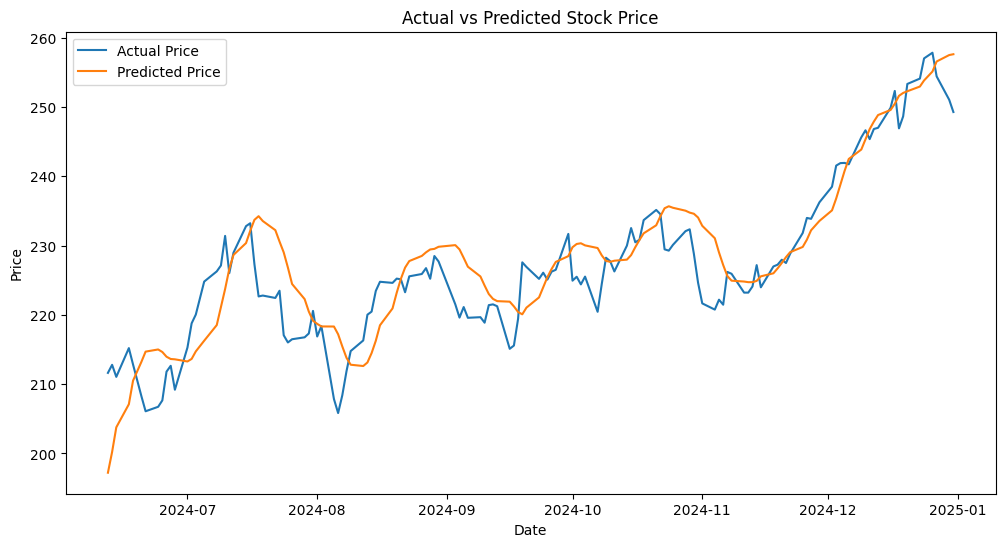

In [11]:
actual = close_data[-len(predictions):]

plt.figure(figsize=(12,6))
plt.plot(actual.index, actual['Close'], label="Actual Price")
plt.plot(actual.index, predictions, label="Predicted Price")
plt.title("Actual vs Predicted Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

***`Predict Tomorrow’s Price`***

In [12]:
last_60 = scaled_data[-60:]
last_60 = last_60.reshape(1, 60, 1)

tomorrow_price = model.predict(last_60)
tomorrow_price = scaler.inverse_transform(tomorrow_price)

print("Predicted price for tomorrow:", tomorrow_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted price for tomorrow: 257.055
